<a href="https://colab.research.google.com/github/mili-b/mili-b/blob/main/Data201_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Programs and Read in Data 

In [ ]:
# Project looks at New York State Energy Research and Development Authority (NYSERDA) data for the
# NY-Sun initiative - a "public-private partnership aims to drive growth of the solar industry"
# and to help meet NYS climate goals, one of which is 6,000 MW of Solar by 2025


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#read in excel file. note - excel version was 20mb compared to csv of 27 mb
#making it easier to read the excel into github
#Note - during the read process, empty cells automatically filled in with NaN's

df = pd.read_excel('https://raw.githubusercontent.com/mili-b/mili-b/master/Solar_Electric_Programs_Reported_by_NYSERDA__Beginning_2000.xlsx')
df



,Reporting Period,Project Number,Legacy Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,Purchase Type,Date Application Received,Date Completed,Project Status,Contractor,Primary Inverter Manufacturer,Primary Inverter Model Number,Total Inverter Quantity,Primary PV Module Manufacturer,PV Module Model Number,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Georeference
0,2021-06-30,305,01001-00048,Williamson,Wayne,NY,14589,Non-Residential,Residential/Small Commercial,PON 1184,NaN,NaN,2003-08-03,2005-06-23,Complete,"Solar Works, Inc.",Fronius USA,IG 2500-LV,1.0,BP Solar,BP3125S,16.0,NaN,NaN,2.00,NaN,NaN,No,No,No,POINT (-77.175308 43.241518)
1,2021-06-30,2011-188607-SLPR,NaN,Syosset,Nassau,NY,11791,Residential,Residential/Small Commercial,SLPR 2010 Residential,Long Island Power Authority,Purchase,2009-09-04,2009-09-04,Complete,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,756.00,0.22,258.0,NaN,No,No,No,POINT (-73.502403 40.818622)
2,2021-06-30,2011-157262-SLPR,NaN,Bellport,Suffolk,NY,11713,Residential,Residential/Small Commercial,SLPR 2010 Residential,Long Island Power Authority,Purchase,2006-12-05,2006-12-05,Complete,NaN,NaN,NaN,0.0,NaN,NaN,0.0,1412.0,1360.00,0.34,399.0,NaN,No,No,No,POINT (-72.944839 40.777628)
3,2021-06-30,256419,NaN,Queens,Queens,NY,11420,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Purchase,2020-07-31,NaT,Pipeline,NaN,NaN,NaN,0.0,NaN,NaN,0.0,32428.0,1474.00,7.37,9654.0,NaN,No,No,No,POINT (-73.815675 40.673382)
4,2021-06-30,2014-655036-Sola,NaN,Babylon,Suffolk,NY,11702,Residential,Residential/Small Commercial,Solar Pioneer,Long Island Power Authority,Purchase,2014-05-25,2015-10-22,Complete,LEVEL SOLAR,SolarEdge,NaN,1.0,Yingli Ene,NaN,16.0,20400.0,1865.44,4.00,4695.0,NaN,No,No,No,POINT (-73.380416 40.653301)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120568,2021-06-30,228298,NaN,Wawayanda,Orange,NY,10958,Non-Residential,Commercial/Industrial (MW Block),PON 3082,Orange and Rockland Utilities,Lease,2020-01-17,NaT,Pipeline,Nexamp Inc.,SMA America,SHP 150-US-20 [600V],14.0,JA Solar,JAM72D09-385/BP,6552.0,3365000.0,807206.40,2522.52,3535564.0,NaN,No,Yes,No,POINT (-74.42923 41.383487)
120569,2021-06-30,49850A-1,NaN,Lackawanna,Erie,NY,14218,Non-Residential,Commercial/Industrial (Competitive),PON 2956,National Grid,Power Purchase Agreement,2015-08-20,2019-09-25,Complete,Steel Sun 2 LLC,NaN,NaN,NaN,NaN,NaN,NaN,6083000.0,1460163.00,2999.00,3520346.0,NaN,No,No,No,POINT (-78.818268 42.818699)
120570,2021-06-30,301904,NaN,Triangle,Broome,NY,13862,Non-Residential,Commercial/Industrial (MW Block),PON 3082,NYS Electric and Gas,Power Purchase Agreement,2021-05-23,NaT,Pipeline,"Delaware River Solar, LLC",INGETEAM POWER TECHNOLOGY S.A,INGECON SUN 1245TL U B480 [480V],3.0,Hanwha Q CELLS,Q.PEAK DUO L-G8.3/BGT 410,12960.0,6376320.0,584496.00,5313.60,6237316.0,NaN,No,Yes,No,POINT (-75.940895 42.330498)
120571,2021-06-30,250821,NaN,Schaghticoke,Rensselaer,NY,12154,Non-Residential,Commercial/Industrial (MW Block),PON 3082,National Grid,Lease,2020-08-08,NaT,Pipeline,"Eden Renewables, LLC",Yaskawa Solectria Solar,XGI 1500-166/166 [600V],30.0,Vikram Solar,ELDORA VSP.72.330.03.04,22708.0,8359077.0,2772646.80,7493.64,10503086.0,NaN,No,Yes,No,POINT (-73.601518 42.931823)


# Size of Dataset

In [ ]:
df.shape
# each row represents a project

(120573, 31)

# Time Period Covered

In [ ]:
# COVERS THE ALMOST 21-YEAR PERIOD FROM DEC 21, 2000 TO JUNE 30, 2021
# DATA REPORTED AS OF JUNE 30, 2021

df['Date Application Received'].min()  #earliest reported date

Timestamp('2000-12-21 00:00:00')

In [ ]:
df['Date Application Received'].max()  #latest reported date

Timestamp('2021-06-30 00:00:00')

# Data Types

In [ ]:
# DATA TYPES
df.dtypes


Reporting Period                         datetime64[ns]
Project Number                                   object
Legacy Project Number                            object
City                                             object
County                                           object
State                                            object
Zip Code                                          int64
Sector                                           object
Program Type                                     object
Solicitation                                     object
Electric Utility                                 object
Purchase Type                                    object
Date Application Received                datetime64[ns]
Date Completed                           datetime64[ns]
Project Status                                   object
Contractor                                       object
Primary Inverter Manufacturer                    object
Primary Inverter Model Number                   

# Missing Data

In [ ]:

#Missing values
df.isna().sum()


Reporting Period                             0
Project Number                               0
Legacy Project Number                    65279
City                                         0
County                                     367
State                                        0
Zip Code                                     0
Sector                                       0
Program Type                                 0
Solicitation                                 0
Electric Utility                            44
Purchase Type                             5489
Date Application Received                    0
Date Completed                            5827
Project Status                               0
Contractor                                9115
Primary Inverter Manufacturer             4064
Primary Inverter Model Number            12915
Total Inverter Quantity                    116
Primary PV Module Manufacturer            4015
PV Module Model Number                   12928
Total PV Modu

# Descriptive Statisitcs

In [ ]:
# Means and medians appear to depart significantly, suggesting skewness in the data.
# means are bigger than the medians suggesting right skewness - a few very big projects -
#       likely associated with the Commercial/Industrial(MW Block) program. Also suggest extreme values.
# Ranges are wide - not surprising. Some project applications likely were recently received, 
#meaning no incentive yet approved, and no output/capacity as yet, while the majority are completed
df.describe()


,Zip Code,Total Inverter Quantity,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production
count,120573.000000,120457.000000,120450.000000,1.199160e+05,1.168760e+05,120573.000000,1.205080e+05
mean,11842.201281,9.546037,110.677468,8.770673e+04,1.689593e+04,41.314422,4.962219e+04
std,1115.255564,23.524574,1019.394148,5.556143e+05,1.291787e+05,397.344160,5.033862e+05
min,501.000000,0.000000,0.000000,1.500000e+02,0.000000e+00,0.000000,0.000000e+00
25%,11010.000000,1.000000,17.000000,2.184768e+04,1.686000e+03,5.040000,5.520000e+03
50%,11727.000000,2.000000,24.000000,3.083128e+04,3.030000e+03,7.130000,7.741000e+03
75%,12444.000000,16.000000,34.000000,4.368000e+04,6.360000e+03,9.960000,1.086200e+04
max,22310.000000,6067.000000,36088.000000,2.646278e+07,6.125000e+06,9787.680000,1.148917e+07


### Correlation Matrix

In [ ]:

#high positive correlations - Total PV Module Quantity, Project Cost, $Incentive, 
#      Total Nameplate kW DC, Expected KWh Annual Production
df.corr()

,Zip Code,Total Inverter Quantity,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production
Zip Code,1.000000,-0.034576,0.095446,0.087318,0.083927,0.096081,0.094322
Total Inverter Quantity,-0.034576,1.000000,0.078096,0.087815,0.048756,0.073714,0.069056
Total PV Module Quantity,0.095446,0.078096,1.000000,0.924793,0.842357,0.989134,0.974415
Project Cost,0.087318,0.087815,0.924793,1.000000,0.855631,0.931946,0.911806
$Incentive,0.083927,0.048756,0.842357,0.855631,1.000000,0.851362,0.834190
Total Nameplate kW DC,0.096081,0.073714,0.989134,0.931946,0.851362,1.000000,0.988175
Expected KWh Annual Production,0.094322,0.069056,0.974415,0.911806,0.834190,0.988175,1.000000


# Unique Identifier

In [ ]:
#UNIQUE IDENTIFIER
df['Project Number'].is_unique


True

# Project Status

In [ ]:
# MOST PROJECTS ARE COMPLETE AS OF JUNE 30, 2021
# 95% of projects completed and 5% in the pipeline

df.groupby(['Project Status'])['Project Number'].count().sort_values(ascending=False)


Project Status
Complete    114746
Pipeline      5827
Name: Project Number, dtype: int64

# Drop Columns

In [ ]:
# Drop columns with plenty missing values and/or not expect to use

drop_columns = ['Legacy Project Number', 'Purchase Type', 'Contractor', 'Solicitation', 'Primary Inverter Manufacturer', 
                'Primary Inverter Model Number', 'Total Inverter Quantity', 'Primary PV Module Manufacturer', 
                'PV Module Model Number', 'Remote Net Metering']
df2 = df.drop(drop_columns, axis=1)
df2.head(3)

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Electric Utility,Date Application Received,Date Completed,Project Status,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Georeference
0,2021-06-30,305,Williamson,Wayne,NY,14589,Non-Residential,Residential/Small Commercial,NaN,2003-08-03,2005-06-23,Complete,16.0,NaN,NaN,2.00,NaN,No,No,No,POINT (-77.175308 43.241518)
1,2021-06-30,2011-188607-SLPR,Syosset,Nassau,NY,11791,Residential,Residential/Small Commercial,Long Island Power Authority,2009-09-04,2009-09-04,Complete,0.0,NaN,756.0,0.22,258.0,No,No,No,POINT (-73.502403 40.818622)
2,2021-06-30,2011-157262-SLPR,Bellport,Suffolk,NY,11713,Residential,Residential/Small Commercial,Long Island Power Authority,2006-12-05,2006-12-05,Complete,0.0,1412.0,1360.0,0.34,399.0,No,No,No,POINT (-72.944839 40.777628)


# Sort Data

In [ ]:
# SORT DATA BY COLUMN: "Date Application Received" IN ASCENDING ORDER - 
# to be able to cumulate expected production (Expected KWh Annual Production) and installed capacity (Total Nameplate kW DC)
df3 = df2.sort_values(['Date Application Received'], ascending=True)
df3.head(4)


,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Electric Utility,Date Application Received,Date Completed,Project Status,Contractor,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Georeference
66230,2021-06-30,2011-156225-SLPR,Bethpage,Nassau,NY,11714,Residential,Residential/Small Commercial,Long Island Power Authority,2000-12-21,2000-12-21,Complete,NaN,0.0,10433.2,3600.0,1.2,1409.0,No,No,No,POINT (-73.484996 40.740895)
70152,2021-06-30,2011-156227-SLPR,Centereach,Suffolk,NY,11720,Residential,Residential/Small Commercial,Long Island Power Authority,2000-12-21,2000-12-21,Complete,NaN,0.0,10700.0,3600.0,1.2,1409.0,No,No,No,POINT (-73.081448 40.871411)
65251,2021-06-30,2011-156228-SLPR,Jamesport,Suffolk,NY,11947,Residential,Residential/Small Commercial,Long Island Power Authority,2001-03-07,2001-03-07,Complete,NaN,0.0,35143.3,13200.0,4.4,5165.0,No,No,No,POINT (-72.586562 40.947229)
84450,2021-06-30,2011-156229-SLPR,Massapequa,Nassau,NY,11758,Residential,Residential/Small Commercial,Long Island Power Authority,2001-03-07,2001-03-07,Complete,NaN,0.0,15249.0,5400.0,1.8,2113.0,No,No,No,POINT (-73.460296 40.682417)


# Add Two New Columns

In [ ]:

# ADD TWO NEW COLUMNS TO df3 - 'CUMULATIVE Expected KWh Annual Production' and 'CUMULATIVE Total Nameplate kW DC'
#this cumulates expected production (Expected KWh Annual Production) and installed capacity (Total Nameplate kW DC)

df3['CUMULATIVE Expected KWh Annual Production'] = df3['Expected KWh Annual Production'].cumsum()
df3['CUMULATIVE Total Nameplate kW DC'] = df3['Total Nameplate kW DC'].cumsum()
df3.head(3)


,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Electric Utility,Date Application Received,Date Completed,Project Status,Contractor,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Georeference,CUMULATIVE Expected KWh Annual Production,CUMULATIVE Total Nameplate kW DC
66230,2021-06-30,2011-156225-SLPR,Bethpage,Nassau,NY,11714,Residential,Residential/Small Commercial,Long Island Power Authority,2000-12-21,2000-12-21,Complete,NaN,0.0,10433.2,3600.0,1.2,1409.0,No,No,No,POINT (-73.484996 40.740895),1409.0,1.2
70152,2021-06-30,2011-156227-SLPR,Centereach,Suffolk,NY,11720,Residential,Residential/Small Commercial,Long Island Power Authority,2000-12-21,2000-12-21,Complete,NaN,0.0,10700.0,3600.0,1.2,1409.0,No,No,No,POINT (-73.081448 40.871411),2818.0,2.4
65251,2021-06-30,2011-156228-SLPR,Jamesport,Suffolk,NY,11947,Residential,Residential/Small Commercial,Long Island Power Authority,2001-03-07,2001-03-07,Complete,NaN,0.0,35143.3,13200.0,4.4,5165.0,No,No,No,POINT (-72.586562 40.947229),7983.0,6.8


# **PROGRAM PERFORMANCE**

## Cumulative Expected Production and Capacity

### After About 2012/2013, Expected Output and Capacity Grows Exponentially

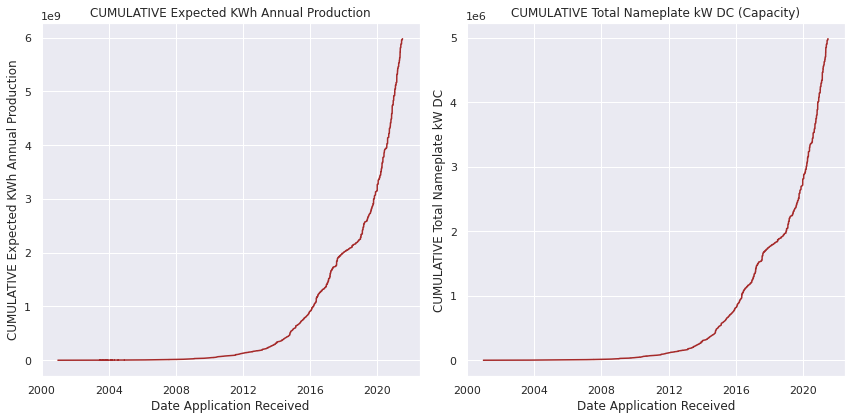

In [ ]:

# CUMULATIVE EXPECTED PRODUCTION = CUMULATIVE Expected KWh Annual Production
# AND CUMULATIVE CAPACITY = CUMULATIVE Total Nameplate kW DC


X1 = df3['Date Application Received']
Y1 = df3['CUMULATIVE Expected KWh Annual Production']
Y2 = df3['CUMULATIVE Total Nameplate kW DC']

sns.set(rc={"figure.figsize":(12, 6)}) #width=12, height=6
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(X1, Y1, color="brown")
plt.title("CUMULATIVE Expected KWh Annual Production")
plt.xlabel('Date Application Received')
plt.ylabel('CUMULATIVE Expected KWh Annual Production')
plt.tight_layout()


plt.subplot(1, 2, 2) # index 2
plt.plot(X1, Y2, color="brown")
plt.title("CUMULATIVE Total Nameplate kW DC (Capacity)")
plt.xlabel('Date Application Received')
plt.ylabel('CUMULATIVE Total Nameplate kW DC')
plt.tight_layout()


## What Contributed to Performance Acceleration after 2012/2013?

### Size of Incentives Increased - Hence, Project Size(Cost), Expected Production and Capacity Increased

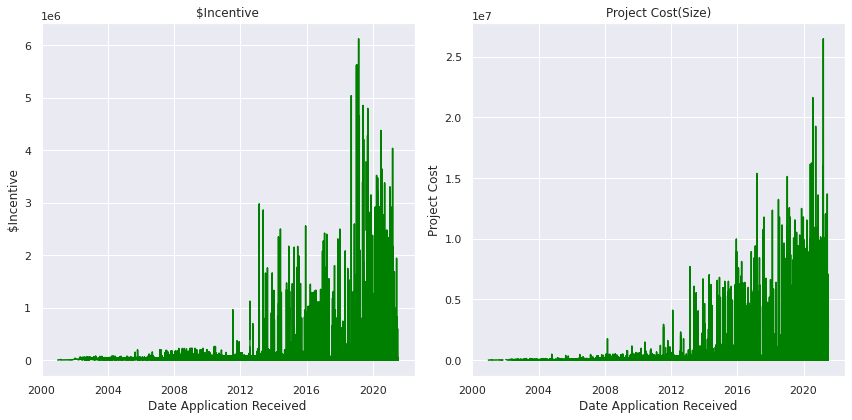

In [ ]:

# The State increased incentives after 2012/2013, resulting in:
# bigger size projects undertaken (Project Cost) after 2012/2013 and hence,
# bigger 'Expected KWh Annual Production' per project and,
# bigger 'Total Nameplate kW DC' (capacity) per project
# these results are supported by the correlation matrix

#as incentive increase, project cost/size increase
X1 = df3['Date Application Received']
Y1 = df3['$Incentive']
Y2 = df3['Project Cost']

sns.set(rc={"figure.figsize":(12, 6)}) #width=12, height=6
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(X1, Y1, color="green")
plt.title("$Incentive")
plt.xlabel('Date Application Received')
plt.ylabel('$Incentive')
plt.tight_layout()


plt.subplot(1, 2, 2) # index 2
plt.plot(X1, Y2, color="green")
plt.title("Project Cost(Size)")
plt.xlabel('Date Application Received')
plt.ylabel('Project Cost')
plt.tight_layout()

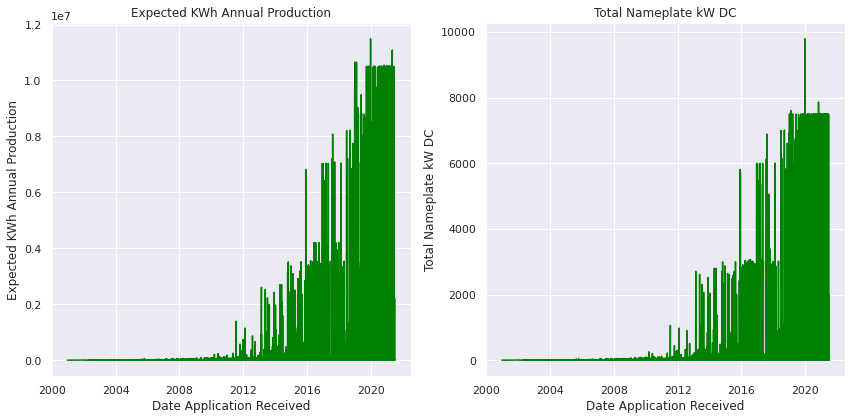

In [ ]:
#expected output and capacity per project also increase
X1 = df3['Date Application Received']
Y1 = df3['Expected KWh Annual Production']
Y2 = df3['Total Nameplate kW DC']

sns.set(rc={"figure.figsize":(12, 6)}) #width=12, height=6
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(X1, Y1, color="green")
plt.title("Expected KWh Annual Production")
plt.xlabel('Date Application Received')
plt.ylabel('Expected KWh Annual Production')
plt.tight_layout()

plt.subplot(1, 2, 2) # index 2
plt.plot(X1, Y2, color="green")
plt.title("Total Nameplate kW DC")
plt.xlabel('Date Application Received')
plt.ylabel('Total Nameplate kW DC')
plt.tight_layout()


In [ ]:
#above supported by correlation matrix
#correlation matrix - $Incentive highly correlated with Project Cost, Total Nameplate kW DC
#      and Expected KWh Annual Production

df4 = df[['Project Cost', '$Incentive', 'Total Nameplate kW DC', 'Expected KWh Annual Production']]
df4.corr()

,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production
Project Cost,1.000000,0.855631,0.931946,0.911806
$Incentive,0.855631,1.000000,0.851362,0.834190
Total Nameplate kW DC,0.931946,0.851362,1.000000,0.988175
Expected KWh Annual Production,0.911806,0.834190,0.988175,1.000000


# **ANALYSIS BY PROGRAM TYPE**

### While the Residential/Small Commercial program accounts for most of the projects, Commercial/Industrial(MW Block) program accounts for the biggest average incentive, and the most of aggregate production and capacity

Text(0.5, 1.0, 'Number of Projects by Program Type')

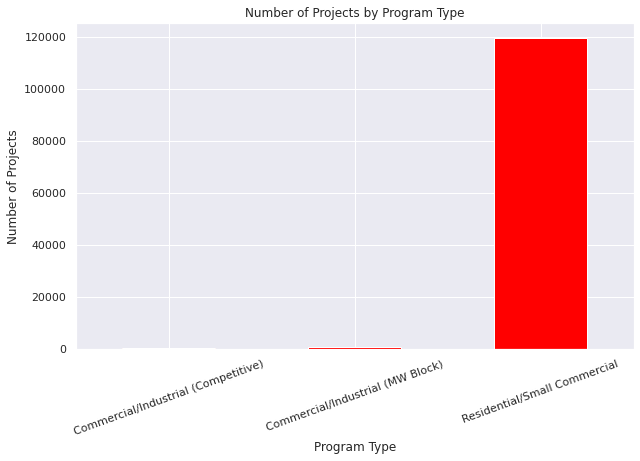

In [ ]:
# ANAYSIS BY PROGRAM TYPE
#Residential/small commercial = less than 200KW
#Commercial/Industrial(competitive) = more than 200KW (being phased out)
#Commercial/Industrial(MW Block) = more than 200KW. NY-Sun assigns a certain 
#   amount of incentives to each of the three (NYS) regions. Each region is then broken 
#   into blocks that are designated an allocation of megawatts (MW) eligible for 
#   NY-Sun incentives. Incentives remain available until all blocks within a 
#   region/sector are fully subscribed. (NYS website)


# (1)The Residental/Small Commercial program accounts for the overwhelming majority of projects
# (2)However, the Commercial/Industrial (MW Block) program got the biggest incentives on average,
#       while Residentail/Small Commercial program got the smallest
# (3)The Commercial/Industrial (MW Block) program also accounts for most of aggregate overall expected production
#       (Sum - Expected KWh Annual Production over the Period) and aggregate overal capacity (Sum - Total Nameplate kW DC )


#Residental/Small Commercial accounts for most projects
df3.groupby(['Program Type'])['Project Number'].count().plot(kind="bar", color="red", figsize=(10, 6))
plt.xlabel("Program Type")
plt.xticks(rotation=20)
plt.ylabel("Number of Projects")
plt.title("Number of Projects by Program Type")



Text(0.5, 1.0, 'Median $Incentive by Program Type')

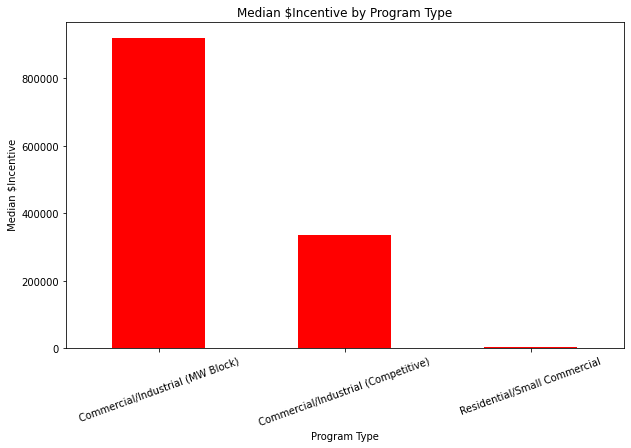

In [ ]:
#Commercial/Industrial (MW Block) gets biggest median incentive
df3.groupby(['Program Type'])['$Incentive'].median().sort_values(ascending=False)
df3.groupby(['Program Type'])['$Incentive'].median().sort_values(ascending=False).plot(kind="bar", color="red", figsize=(10, 6))
plt.xlabel("Program Type")
plt.xticks(rotation=20)
plt.ylabel(" Median $Incentive")
plt.title("Median $Incentive by Program Type")


Text(0.5, 1.0, 'Aggregate Expected Production and Capacity')

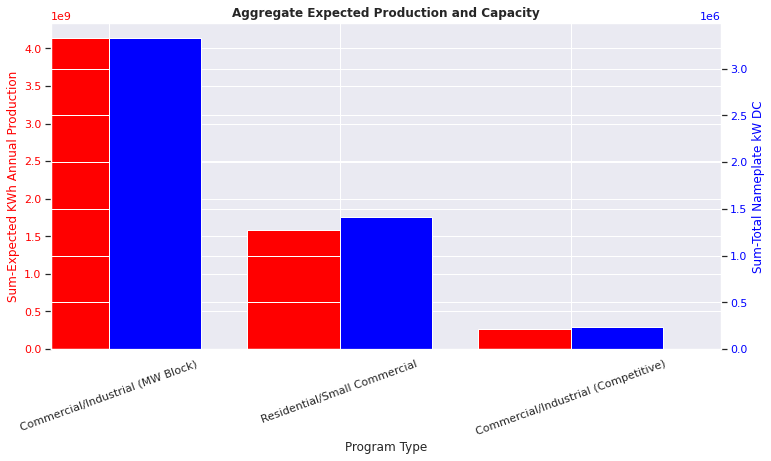

In [ ]:
#Commercial/Indusrial (MB Block) also accounts for the most of aggrgate
#production and capacity

#chart on two axes - sum of Expected KWh Annual Production vs. sum of Total Nameplate kW DC over the entire period
sns.set(rc={"figure.figsize":(12, 6)}) #width=12, height=6
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

df3.groupby(['Program Type'])['Expected KWh Annual Production'].sum().sort_values(ascending=False).plot(kind='bar', rot = 20, color='red', ax=ax, width=width, position=1)
ax.tick_params(axis ='y', labelcolor = 'red')
df3.groupby(['Program Type'])['Total Nameplate kW DC'].sum().sort_values(ascending=False).plot(kind='bar', rot = 20, color='blue', ax=ax2, width=width, position=0)
ax2.tick_params(axis ='y', labelcolor = 'blue')
ax.set_ylabel('Sum-Expected KWh Annual Production', color = 'red')
ax2.set_ylabel('Sum-Total Nameplate kW DC', color = 'blue')

plt.title('Aggregate Expected Production and Capacity', fontweight ="bold")


## ROI - Where is the Bang for the Buck (by Program Type)?

### greatest return for any given level of incentives is from commercial/industrial(MW Block), followed by Residential

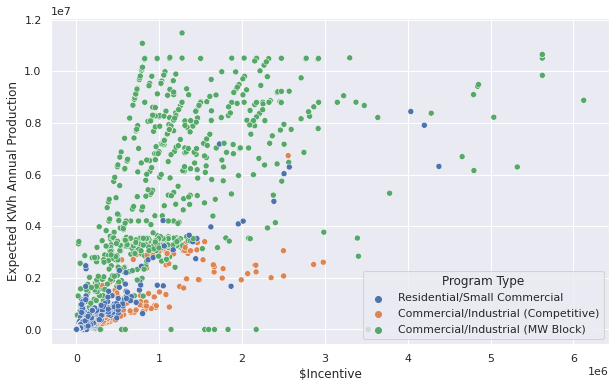

In [ ]:

# For any given level of incentive, we can expect -
#     most expected output from Commercial/Industrial (MW Block)
#     biggest capacity from Commercial/Industrial (MW Block)
#     biggest size projects (project cost) from Commercial/Industrial (MW Block)
#next bang for the buck appears to be from Residential/Small Commercial, 
#     and thirdly, Commercial/Industrial (Competitive)


#sns.set(rc={"figure.figsize":(8, 4)}) #width=8, height=4
#sns.jointplot(x='$Incentive', y='Expected KWh Annual Production', data=df3, hue='Program Type')
sns.set(rc={"figure.figsize":(10, 6)}) #width=10, height=6
sns.scatterplot(data=df3, x='$Incentive', y='Expected KWh Annual Production', hue='Program Type')

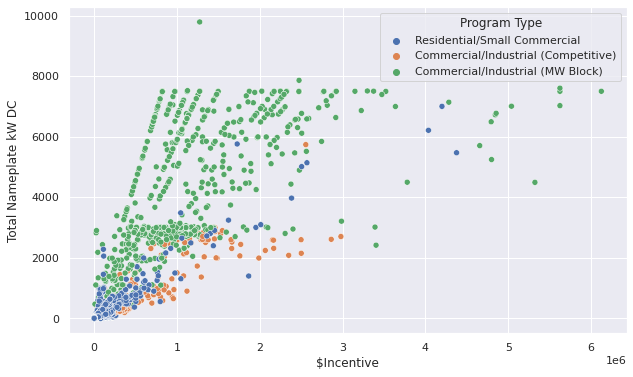

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)}) #width=10, height=6
sns.scatterplot(data=df3, x='$Incentive', y='Total Nameplate kW DC', hue='Program Type')

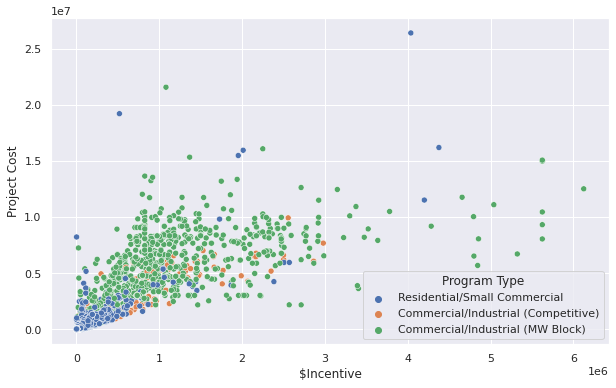

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)}) #width=10, height=6
sns.scatterplot(data=df3, x='$Incentive', y='Project Cost', hue='Program Type')

# **ANALYSIS BY ELECTRIC UTILITY COMPANY**

### Coned has the most number of projects but National Grid accounts for most of aggregate production and capacity, while Rochester Gas and Electric has the biggest average size project and average size expected production and capacity

Text(0.5, 1.0, 'Number of Projects by Electric Utility Company')

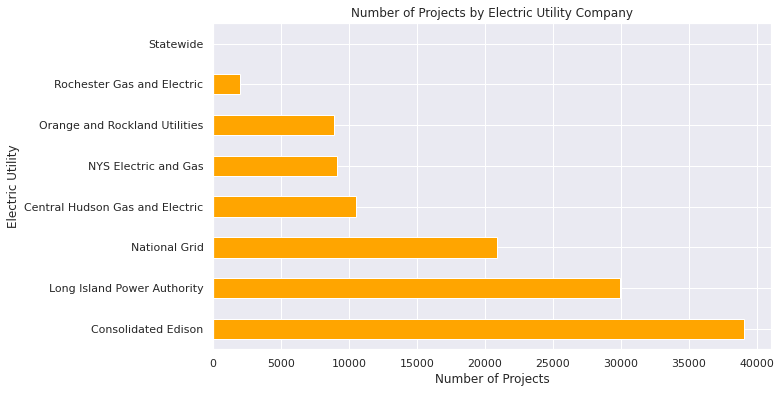

In [ ]:

# (1)Consolidated Edison (ConEd) has the most number of projects, followed by 
#        Long Island Power Authority (LIPA) and National Grid
# (2)However, National Grid accounts for most of aggregate expected production (Sum-Expected KWh Annual Production)
#        and most of aggregate capacity (Sum-Total Nameplate kW DC)
# (3)Rochester Gas and Electric has the biggest - average project size, average capacity and average expected production

#Coned has the most projects
df.groupby(['Electric Utility'])['Project Number'].count().sort_values(ascending=False).plot(kind="barh", color="orange", figsize=(10, 6))
plt.xlabel("Number of Projects")
plt.title("Number of Projects by Electric Utility Company")
#plt.ylabel(" Program Type")


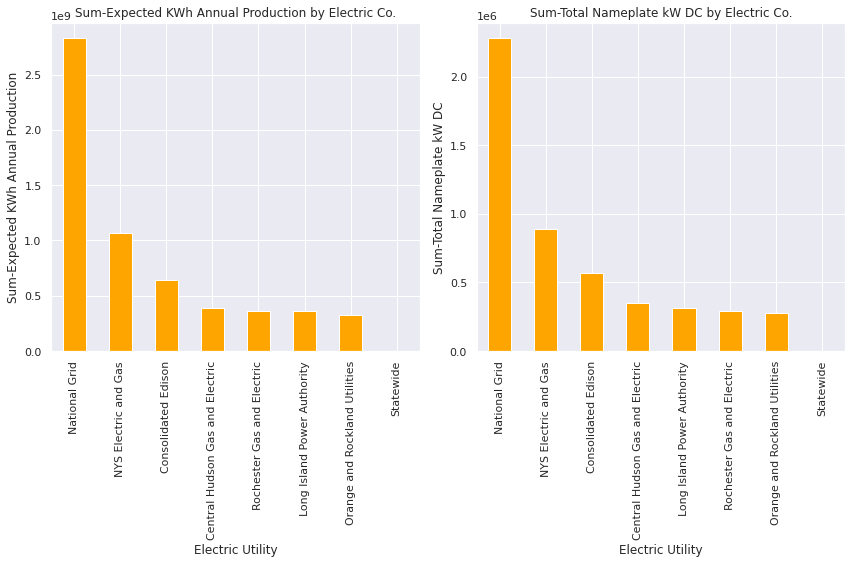

In [ ]:
# "Sum-Expected KWh Annual Production" and "Sum-Total Nameplate kW DC" by Electric Utility
#National Grid accounts for most of aggregate production and aggregate capacity
sns.set(rc={"figure.figsize":(12, 8)}) #width=12, height=8
plt.subplot(1, 2, 1) # row 1, col 2 index 1
df3.groupby(['Electric Utility'])['Expected KWh Annual Production'].sum().sort_values(ascending=False).plot(kind="bar", color="orange")
plt.title("Sum-Expected KWh Annual Production by Electric Co.")
plt.xlabel('Electric Utility')
plt.ylabel('Sum-Expected KWh Annual Production')
plt.tight_layout()


plt.subplot(1, 2, 2) # index 2
df3.groupby(['Electric Utility'])['Total Nameplate kW DC'].sum().sort_values(ascending=False).plot(kind="bar", color="orange")
plt.title("Sum-Total Nameplate kW DC by Electric Co.")
plt.xlabel('Electric Utility')
plt.ylabel('Sum-Total Nameplate kW DC')
plt.tight_layout()


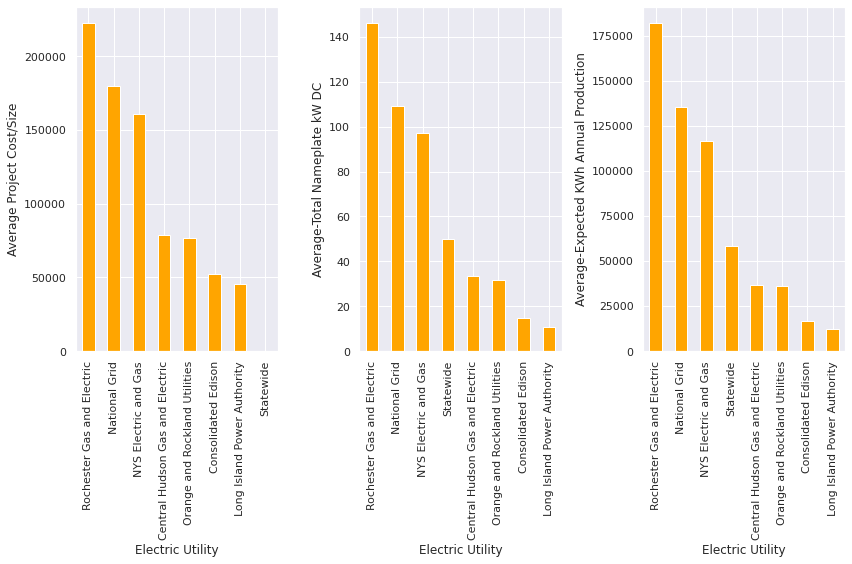

In [ ]:
#Average Project Cost/Size, Average Capacity and Average Expected Production by Electric Utility
#Rochester Gas and Electic has the biggest projects on average
sns.set(rc={"figure.figsize":(12, 8)}) #width=12, height=8
plt.subplot(1, 3, 1) # row 1, col 2 index 1
df3.groupby(['Electric Utility'])['Project Cost'].mean().sort_values(ascending=False).plot(kind="bar", color="orange")
#plt.title("Average Project Cost/Size by Electric Co.")
plt.xlabel('Electric Utility')
plt.ylabel('Average Project Cost/Size')
plt.tight_layout()


plt.subplot(1, 3, 2) # index 2
df3.groupby(['Electric Utility'])['Total Nameplate kW DC'].mean().sort_values(ascending=False).plot(kind="bar", color="orange")
#plt.title("Average-Total Nameplate kW DC by Electric Co.")
plt.xlabel('Electric Utility')
plt.ylabel('Average-Total Nameplate kW DC')
plt.tight_layout()

plt.subplot(1, 3, 3) # index 3
df3.groupby(['Electric Utility'])['Expected KWh Annual Production'].mean().sort_values(ascending=False).plot(kind="bar", color="orange")
#plt.title("Average-Expected KWh Annual Production by Electric Co.")
plt.xlabel('Electric Utility')
plt.ylabel('Average-Expected KWh Annual Production')
plt.tight_layout()


# **ANALYSIS BY COUNTY**

### Most projects are located in Suffolk, followed by Queens and Nassau. However, most of aggregate expected production and capacity are located in Orange County, (followed by Monroe and Suffolk)

Text(0, 0.5, ' Number of Projects')

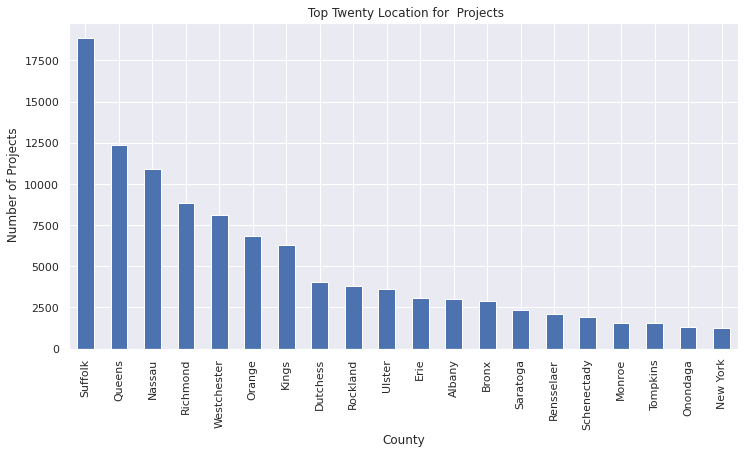

In [ ]:

# By Number of Projects:
# (1)Suffolk county has the most number of projects located there, followed by Queens, Nassau
# (2) Long Island (Suffolk is first and Nassau is third) dominates the top 20 locations for number of projects
# (3) NYC - all NYC five counties are in the top twenty counties for number of projects
#           (Queens, Richmonf, Kings, Bronx, New York)

#By capacity (Total Nameplate kW DC) and Expected Annual Production:
# (4) However, Orange county has the most aggregate cpacity and aggregate expected production located there
#             Monroe and Suffolk counties round out the top three

#Suffolk has the most projects
df.groupby(['County'])['Project Number'].count().sort_values(ascending=False).head(20).plot(kind="bar", figsize=(12, 6))
#plt.xlabel("Number of Projects")
plt.title(" Top Twenty Location for  Projects")
plt.ylabel(" Number of Projects")

Text(0, 0.5, ' Total Capacity (Total Nameplate kW DC)')

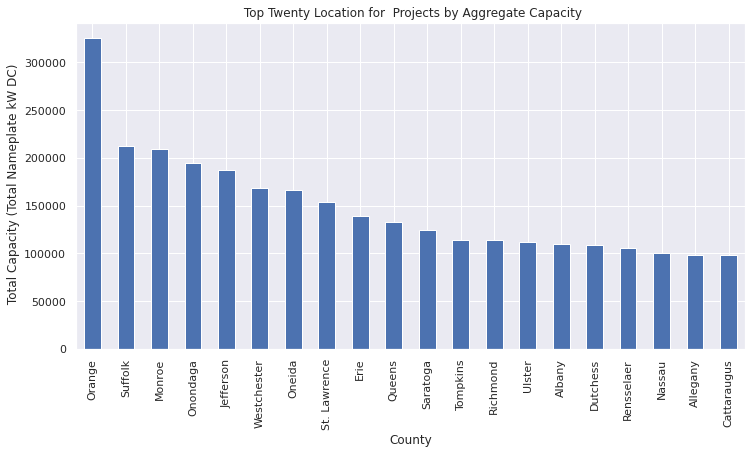

In [ ]:

#Orange County has the most capacity located there
df.groupby(['County'])['Total Nameplate kW DC'].sum().sort_values(ascending=False).head(20).plot(kind="bar", figsize=(12, 6))
#plt.xlabel("Total Capacity (Total Nameplate kW DC) by County")
plt.title(" Top Twenty Location for  Projects by Aggregate Capacity")
plt.ylabel(" Total Capacity (Total Nameplate kW DC)")


Text(0, 0.5, ' Sum Total Expected KWh Annual Production')

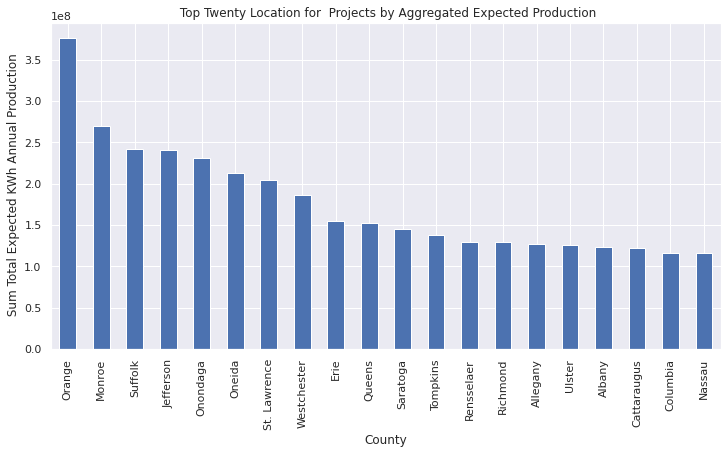

In [ ]:

#Orange Count has the most aggregate expected annual production located there
df.groupby(['County'])['Expected KWh Annual Production'].sum().sort_values(ascending=False).head(20).plot(kind="bar", figsize=(12, 6))
#plt.xlabel("Sum Expected KWh Annual Production by County")
plt.title(" Top Twenty Location for  Projects by Aggregated Expected Production")
plt.ylabel(" Sum Total Expected KWh Annual Production")

# **ANALYSIS - CONED, LIPA, NATIONAL GRID**

### Coned projects are located mainly in NYC and Westchester, LIPA projects are located mainly in Long Island, and National Grid Projects are located mainly upstate

In [ ]:
# ANALYSIS - CONED, LIPA, NATIONAL GRID

ConEd = df3[df3['Electric Utility'] == 'Consolidated Edison']
#ConEd.head(3)

In [ ]:
LIPA = df3[df3['Electric Utility'] == 'Long Island Power Authority']
#LIPA. head(3)

In [ ]:
NationalGrid = df3[df3['Electric Utility'] == 'National Grid']
#NationalGrid.head(3)

In [ ]:
# ConEd projects are located mainly in NYC and Westchester
ConEd.groupby(['County'])['Project Number'].count().sort_values(ascending=False)


County
Queens         12200
Richmond        8808
Westchester     7678
Kings           6302
Bronx           2898
New York        1036
Nassau            44
Chenango          15
Rockland          12
Chautauqua        12
Orange             9
Herkimer           6
Putnam             6
Dutchess           5
Wayne              3
Albany             2
Oswego             2
Ulster             2
Schenectady        1
Greene             1
Warren             1
Cortland           1
Washington         1
Allegany           1
Jefferson          1
Name: Project Number, dtype: int64

In [ ]:
#LIPA projects are located mainly in Long Island
LIPA.groupby(['County'])['Project Number'].count().sort_values(ascending=False)


County
Suffolk       18850
Nassau        10884
Queens          123
New York         31
Washington        1
Name: Project Number, dtype: int64

In [ ]:
#National Grid Projects are located mainly upstate
NationalGrid.groupby(['County'])['Project Number'].count().sort_values(ascending=False)


County
Albany          2779
Saratoga        2085
Erie            1971
Schenectady     1921
Rensselaer      1814
Onondaga        1200
Montgomery       718
Oneida           712
Columbia         628
Warren           627
Niagara          568
St. Lawrence     560
Washington       559
Oswego           448
Fulton           408
Jefferson        376
Schoharie        372
Chautauqua       353
Monroe           294
Madison          291
Genesee          228
Cortland         211
Livingston       205
Orleans          191
Herkimer         189
Cattaraugus      188
Franklin         155
Essex            135
New York         120
Otsego            79
Lewis             62
Allegany          56
Ontario           50
Wyoming           45
Hamilton          24
Dutchess          24
Tompkins          20
Cayuga            18
Orange            11
Clinton            9
Ulster             8
Greene             6
Westchester        5
Broome             4
Putnam             3
Delaware           3
Queens             3
Nassau

### Cumulative expected production and capacity grow exponentially for all the electric utilites

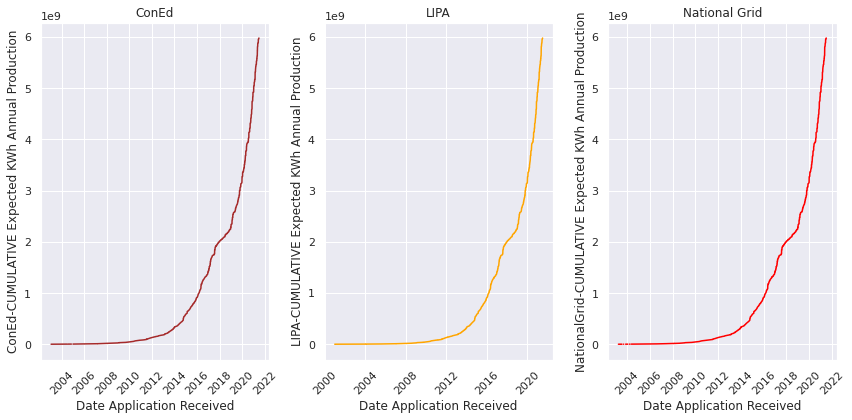

In [ ]:

# All three companies saw exponential growth in expected production

X1 = ConEd['Date Application Received']
Y1 = ConEd['CUMULATIVE Expected KWh Annual Production']
X2 = LIPA['Date Application Received']
Y2 = LIPA['CUMULATIVE Expected KWh Annual Production']
X3 = NationalGrid['Date Application Received']
Y3 = NationalGrid['CUMULATIVE Expected KWh Annual Production']

sns.set(rc={"figure.figsize":(12, 6)}) #width=12, height=6
plt.subplot(1, 3, 1) # row 1, col 2 index 1
plt.plot(X1, Y1, color="brown")
plt.xlabel('Date Application Received')
plt.xticks(rotation=45)
plt.ylabel('ConEd-CUMULATIVE Expected KWh Annual Production')
plt.title('ConEd')
plt.tight_layout()


plt.subplot(1, 3, 2) # index 2
plt.plot(X2, Y2, color="orange")
plt.xlabel('Date Application Received')
plt.xticks(rotation=45)
plt.ylabel('LIPA-CUMULATIVE Expected KWh Annual Production')
plt.title('LIPA')
plt.tight_layout()

plt.subplot(1, 3, 3) # index 3
plt.plot(X3, Y3, color="red")
plt.xlabel('Date Application Received')
plt.xticks(rotation=45)
plt.ylabel('NationalGrid-CUMULATIVE Expected KWh Annual Production')
plt.title('National Grid')
plt.tight_layout()

### National Grid had the biggest size average incentive for the three program types, while Coned had the smallest. LIPA operates only in the Residential/Small Commercial program. Rankings were similar for the median

In [ ]:
# COMPARE AVERAGE INCENTIVE BY PROGRAM TYPE - ALL, CONED, LIPA, NATIONAL GRID

# Residential/Small Commercial program
#       LIPA does only the Residential/Small Commercial program
#       Ranking - NationalGrid=$9,642; LIPA=$8,632; All=$8,074; ConEd=$7,230

#Commercial/Industrial (Competitive)
#       Ranking - National Grid=$951,314; All=$574,715; ConEd=$271,083

#Commercial/Industrial (MW Block)
#       Ranking - National Grid=$1,261,354; All=$1,126,037; ConEd=$408,484


df3.groupby(['Program Type'])['$Incentive'].mean()  #All 

Program Type
Commercial/Industrial (Competitive)    5.747159e+05
Commercial/Industrial (MW Block)       1.126037e+06
Residential/Small Commercial           8.074425e+03
Name: $Incentive, dtype: float64

In [ ]:
ConEd.groupby(['Program Type'])['$Incentive'].mean()   #ConEd

Program Type
Commercial/Industrial (Competitive)    271083.334701
Commercial/Industrial (MW Block)       408484.876944
Residential/Small Commercial             7230.100547
Name: $Incentive, dtype: float64

In [ ]:
LIPA.groupby(['Program Type'])['$Incentive'].mean()    #LIPA

Program Type
Residential/Small Commercial    8632.478785
Name: $Incentive, dtype: float64

In [ ]:
NationalGrid.groupby(['Program Type'])['$Incentive'].mean()    #NationalGrid

Program Type
Commercial/Industrial (Competitive)    9.513145e+05
Commercial/Industrial (MW Block)       1.261354e+06
Residential/Small Commercial           9.642088e+03
Name: $Incentive, dtype: float64

In [ ]:

#ConEd.describe()
#LIPA.describe()
#NationalGrid.describe()